In [1]:
from os import fdopen
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import statistics as stat
from PIL import Image
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import tensorflow as tf # tensorflow 2.0
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
labels = pd.read_csv("../../Xray_TeethLabels_Simple.csv",index_col=0)
Ylabels = labels[5:]
metaY = labels[:3]
X = {}
Y = {}
count1 = 0
count2 = 0
count3 = 0
for picFilename in glob.glob("../../processed3/processed/*"):
    patNumber = picFilename.split('/')[4].split('_')[0]
    toothNumber1 = picFilename.split('/')[4].split('_')[1]
    toothNumber2 = picFilename.split('/')[4].split('_')[2].split('.')[0]
    im = Image.open(picFilename)

    # if int(metaY.loc['Age',patNumber]) < 25:
    #     count1+=1
    #     if 'Age1' in X.keys():
    #         X['Age1'].append(np.array(im))
    #         Y['Age1'].append(1 if Ylabels.loc[toothNumber1,patNumber] == 'Yes' or Ylabels.loc[toothNumber2,patNumber] == 'Yes' else 0)
    #     else:
    #         X['Age1'] = []
    #         X['Age1'].append(np.array(im))
    #         Y['Age1'] = [1 if Ylabels.loc[toothNumber1,patNumber] == 'Yes' or Ylabels.loc[toothNumber2,patNumber] == 'Yes' else 0]

    # if int(metaY.loc['Age',patNumber]) < 40 and int(metaY.loc['Age',patNumber]) > 25:
    #     count2+=1
    #     if 'Age2' in X.keys():
    #         X['Age2'].append(np.array(im))
    #         Y['Age2'].append(1 if Ylabels.loc[toothNumber1,patNumber] == 'Yes' or Ylabels.loc[toothNumber2,patNumber] == 'Yes' else 0)
    #     else:
    #         X['Age2'] = []
    #         X['Age2'].append(np.array(im))
    #         Y['Age2'] = [1 if Ylabels.loc[toothNumber1,patNumber] == 'Yes' or Ylabels.loc[toothNumber2,patNumber] == 'Yes' else 0]

    if int(metaY.loc['Age',patNumber]) > 40:
        if 'Age3' in X.keys():
            X['Age3'].append(np.array(im))
            Y['Age3'].append(1 if Ylabels.loc[toothNumber1,patNumber] == 'Yes' or Ylabels.loc[toothNumber2,patNumber] == 'Yes' else 0)
        else:
            X['Age3'] = []
            X['Age3'].append(np.array(im))
            Y['Age3'] = [1 if Ylabels.loc[toothNumber1,patNumber] == 'Yes' or Ylabels.loc[toothNumber2,patNumber] == 'Yes' else 0]

for age in X.keys():
    ageX = np.array(X[age])
    ageY = Y[age]

    X_train, X_test, Y_train_original, Y_test_original = train_test_split(ageX, np.array(ageY), random_state = 100, test_size=0.20)

    Y_train = tf.keras.utils.to_categorical(Y_train_original, 2)
    Y_test = tf.keras.utils.to_categorical(Y_test_original, 2)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import MaxPooling2D, Dropout
model = Sequential()
model.add(Conv2D(256, 5, activation='relu', input_shape=(500,500,3)))
model.add(MaxPooling2D())
model.add(Conv2D(128, 5, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
max_epochs = 5
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=max_epochs)
info = model.evaluate(X_test, Y_test)
print('Accuracy score for epoches ' + str(max_epochs) + ':', info[1])
predictions = (model.predict(X_test) > 0.5).astype(int)
pred = []
for prediction in predictions:
    i, = np.where(prediction == 1)
    pred.append(i[0])
print(classification_report(Y_test_original, pred))
tn, fp, fn, tp = confusion_matrix(Y_test_original, pred).ravel()
print(tn, fp, fn, tp)

Epoch 1/5
2/2 [==============================] - 111s 31s/step - loss: 60508.1250 - accuracy: 0.5400 - val_loss: 28236.9961 - val_accuracy: 0.5385
Epoch 2/5
2/2 [==============================] - 67s 26s/step - loss: 17936.7129 - accuracy: 0.5200 - val_loss: 0.6536 - val_accuracy: 0.5385
Epoch 3/5
2/2 [==============================] - 65s 25s/step - loss: 0.7263 - accuracy: 0.6400 - val_loss: 0.7686 - val_accuracy: 0.3846
Epoch 4/5
2/2 [==============================] - 63s 25s/step - loss: 0.5329 - accuracy: 0.6600 - val_loss: 2725.7837 - val_accuracy: 0.5385
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 100.0613 - accuracy: 0.4615
Accuracy score for epoches 5: 0.4615384638309479
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.46      1.00      0.63         6

    accuracy                           0.46        13
   macro avg       0.23      0.50      0.32        13
weighted avg   

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
print(Y_test)
print(Y_test.shape)
image = X_test[4]

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
(13, 2)


In [9]:
%load_ext autoreload
%autoreload 2
import os,sys
import lime
from lime import lime_image

In [10]:
explainer = lime_image.LimeImageExplainer()

In [11]:
explanation = explainer.explain_instance(image.astype('double'), model.predict, top_labels=2, hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
from skimage.segmentation import mark_boundaries

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


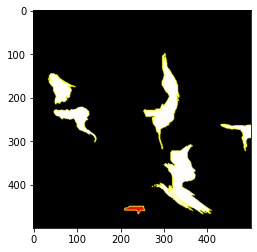

In [13]:
from matplotlib import pyplot as plt
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

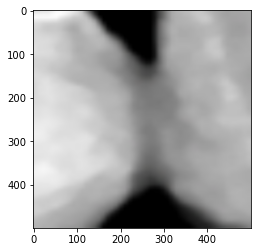

In [14]:
plt.imshow(image)